# Exploratory Data Analysis on Used Cars Dataset

### Objective:
To Perform Exploratory data analysis on used cars dataset and analyzing the dataset to summarize their main characteristics using pandas, statistical graphs and other data visualization methods. It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data

### Dataset source:https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

### Attribute Information
- model: Model of the audi car
- year: registration year of the car
- price: price of the car in pounds
- transmission: type of gearbox (semi,auto,manual)
- mileage: miles that the car has travelled
- fuelType: Engine fuel (petrol, diesel, other)
- tax: road tax paid
- mpg: miles per gallon 
- engineSize: size of engine in litres

### Table Of Content:
- 1. Basic Dara Exploration
- 2. Types of variables
    - 2.1 Numerical variables
    - 2.2 Categorical variables
- 3. Univariate Analysis
    - 3.1 Measure of Central tendency
    - 3.2 Measure of dispersion
- 4. Skewness and kurtosis
- 5. Bivariate Analysis
    - 5.1 Statistical Method
    - 5.2 Continuos Vs Continuos feature
    - 5.3 Continuos Vs Categorical feature
    - 5.4 Categorical Vs Categorical feature
- 6. Multivariate Analysis
    - 6.1 Lmplot
    - 6.2 Pairplot

## Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [ ]:
#df = pd.read_csv('audi.csv')
#df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/audi.csv')
df.head()

Mounted at /content/drive


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


## 1. Explore the data

In [ ]:
# shape method can be used to check the exact shape of data
df.shape 

(10668, 9)

In [ ]:
#info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB



- There are 10668 entries and 9 columns
- There is both int and object type column
- There are no missing values.

In [ ]:
#nuniques() function provides the total number of uniques values present in each feature
df.nunique() 

model             26
year              21
price           3260
transmission       3
mileage         7725
fuelType           3
tax               37
mpg              104
engineSize        19
dtype: int64

In [ ]:
## Lets check the statistical summary of the dataset
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:
df.describe(include='O')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


- Year ranges from 1997 to 2020
- Minimum Price of the car is around 1490 pounds and max is around 145000 pounds.
- Average miles that the car has travelled is around 24827.
- There are 26 unique models.
- 3 unique transmissions.
- 3 unique FuelTypes.

## 2. Types of Variables

### Question 1. Retrieve numerical features from the dataset

#### 2.1 Numerical variables
- if it can assume an infinite number of real values within a given interval.

In [ ]:
df.select_dtypes(include=np.number).head()

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0


- There are 6 numerical variables.
- Here, features like 'year' can be considered as a discrete feature. It ranges from 1997 to 2020 and can take only certain values.
- Minimum 'price' is 1490 and maximum sales price goes upto 145000.

### Question 2. Retrieve the categorical variables from the dataset.

#### 2.2 Categorical Variables
- qualitative in nature and can't be measured.

In [ ]:
df.select_dtypes(include='object').head()

,model,transmission,fuelType
0,A1,Manual,Petrol
1,A6,Automatic,Diesel
2,A1,Manual,Petrol
3,A4,Automatic,Diesel
4,A3,Manual,Petrol


In [ ]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
model,10668,26,A3,1929
transmission,10668,3,Manual,4369
fuelType,10668,3,Diesel,5577


- There are 3 categorical variables.
- Features such as 'fuel Type' has 3 different values. Where in 'Diesel' has the maximum frequency of around 5577.

## 3. Univariate Analysis

### Question 3. It is assumed that the selling price is centered around 20K. Compute the mean, median and mode and comment on this assumption. Use visualization methods to visualise the distribution. 

#### 3.1 Measures of Central Tendency

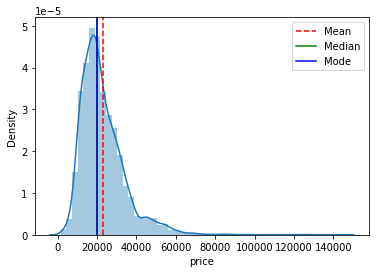

Mean: 22896.685039370077
Median: 20200.0
Mode: 19995


In [ ]:
##Let us understand the distribution of the column 'price'
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode().values[0]

sns.distplot(df['price'])
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')
plt.legend()
plt.show()
print('Mean:',mean)
print("Median:",median)
print('Mode:',mode)

- From the plot we can see that the mean selling price is 22,896.685 pounds.
- Median comes to 20,200.
- And mode value comes at 19,995.
- Hence, we can say that the price is centered around 20000

### Question 4. Irrespective of the price of cars, it is assumed that mileage is similar. Find out the variance and standard deviation for miles travelled and comment on this assumption.

#### 3.2 Measures of dispersion

- Variance: helps in understanding the degree of spread in your data.

In [ ]:
## Calculating the variance of the column 'mileage'
df['mileage'].var()

552497116.2926651

- Standard Deviation: helps in understanding of how dispersed the data is in relation to the mean

In [ ]:
## Standard Deviation
df['mileage'].std()

23505.257205413964

- We can observe that the variance and standard deviation is high. From this we can tell that the data points are very spread out from the mean and from one another.

### Let's see the range between the first and third quartile for the column 'mileage'.

- Interquartile range: Q3-Q1 (3rd quartile - first quartile)

In [ ]:
## IQR
Q1 = df['mileage'].quantile(0.25)
Q2 = df['mileage'].quantile(0.50)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3-Q1
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
print('~'*15)
print('IQR:',IQR)

Q1: 5968.75
Q2: 19000.0
Q3: 36464.5
~~~~~~~~~~~~~~~
IQR: 30495.75


- Maximum tax payed is around 580 pounds.
- Minimum tax payed is 0 pounds.
- The range value is 580 pounds, the range value is high and the data is more spread out from one another.

### Question 5. It is assumed that the **road tax paid** by the car owners for different models is similar and there is not much spread/variation in the data. Find the range for the tax column and comment on this assumption.

- Range: Largest value- smallest value in a set of data

In [ ]:
## Range
print('largest value:',df[''].max())
print('smallest value:',df['tax'].min())
print('range:',df['tax'].max()-df['tax'].min())

largest value: 580
smallest value: 0
range: 580


## 4. Skewness and Kurtosis

###  Question 6. There is a assumption that in the column price there are no existence of the outliers and the distribution is normal. Find the skewness and kurtosis value for the column price and comment on the presence of the outliers and the shape of distribution. Use appropriate plot and visualize the distribution.

In [ ]:
# Skewness and Kurtosis
print("Skewness : %f" % df['price'].skew())
print("Kurtosis : %f" % df['price'].kurt())

Skewness : 2.277323
Kurtosis : 11.671632


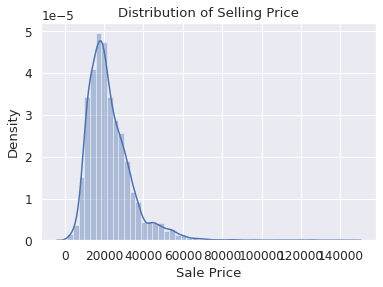

In [ ]:
sns.distplot(df['price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Sale Price')
plt.show()

- From the above we can see that Selling Price is postively skewed or Right skewed as the right tail is longer and there is a presence of outliers.
- 'SalePrice' has high kurtosis around 11.671(leptokurtic) and the distribution is not normal. 

## 5. Bivariate Analysis

### Question 7. Find the direction and strength of relationship among the different pairs of variables using appropriate plot and write your findings. Comment on the relationship between engine_size and price.

#### 5.1 Statistical Method 
- Heatmap

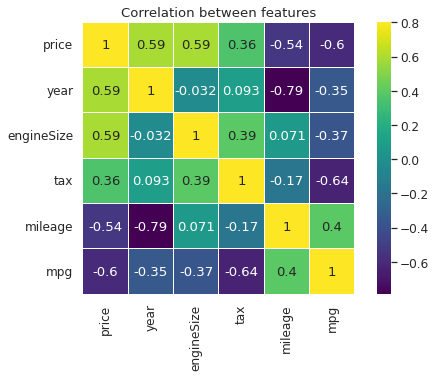

In [ ]:
### heatmap for correlated data
corr_matrix = df[['price', 'year', 'engineSize', 'tax', 'mileage', 'mpg']].corr() 
sns.set(font_scale=1.10)
plt.figure(figsize=(8, 5))

sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

- From the heatmap we can see that selling price of cars has high positive correlation with columns 'year', 'engineSize' and 'tax'.
- Price is having negative correlation with columns 'mileage' and 'mpg'.

### Question 8. It is assumed that when the engine size increases the price of the car also increases significantly. Find the covariance between price and enginesize and comment on this assumption.

In [ ]:
print(df.price.cov(df.engineSize))

4176.401498181528


- A postive correlation suggests that the variables 'Price' & 'engineSize' have a linear relationship.
- Let's cross check this by plotting a graph between the two features.

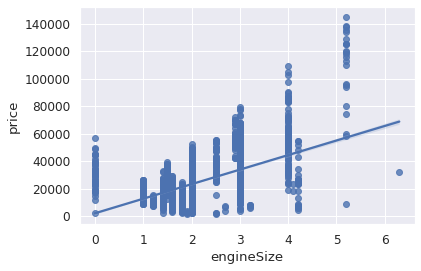

In [ ]:
sns.regplot(x='engineSize', y='price', data=df, robust=True)
plt.show()

- From the plot it is evident that engine size and salesprice has a linear relationship.
- The assumption is true that when the enginesize increases the price of the car also increases significantly.

### Question 9. Find the relationship between price and mileage per gallons 'mpg' and write your observations.

#### 5.2 Continous vs Continuos
- ScatterPlot

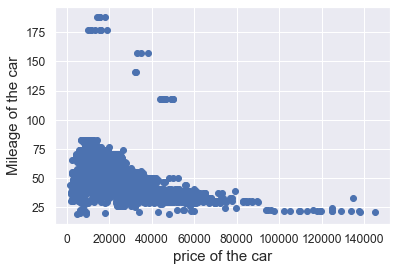

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['price'], y = df['mpg'])
plt.ylabel('Mileage of the car', fontsize=15)
plt.xlabel('price of the car' ,fontsize=15)
plt.show()

- From the graph we can see that cheap car gives very good mileage of around 50-75  miles per gallon.
- Expensive cars has mileage less that 25 miles per gallon.

### Question 10. Find the relationship between Sale price and categorical feature 'fuel Type' and write your observations. Can we say petrol cars have high price value?


#### 5.3 Continuos vs Categorical
- Box Plot

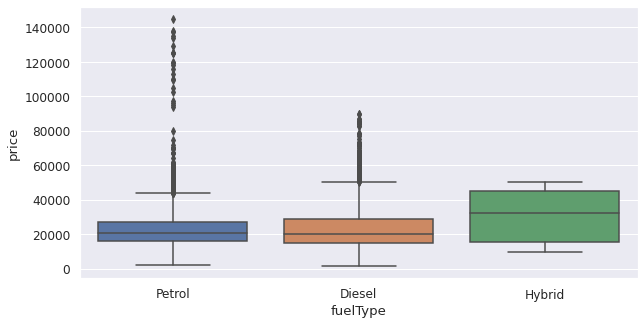

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['fuelType'],df['price'])
plt.show()

- We can observe that the hybrid model has higher price range. 
- From the plot we can also see that there's not much difference in price of petrol or diesel cars.
- We can also observe that there are many outliers in the petrol and diesel fuel_type categories.

#### Question 11. It is assumed that there are more number of cars whose models are A1, A3, A4, and Q3 and there are more number of manual transmission cars. Plot a suitable graph and write your findings.

### 5.4 Categorical vs Categorical
- Stacked Bar Chart

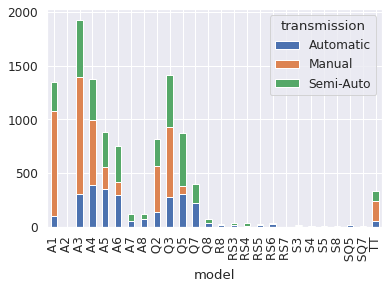

In [ ]:
pd.crosstab(df['model'],df['transmission'],).plot(kind='bar',stacked=True)
plt.show()

- As we can observe from the Stacked Bar chart - 
- A lot of car models have manual transmission.
- Semi-automatic models prevails as compared to automtaic cars.

In [ ]:
df['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

## 6. Multivariate Analysis

### Question 12. Visualise the relationship between tax paid and price of the car in different years.

#### 6.1 Lmplot

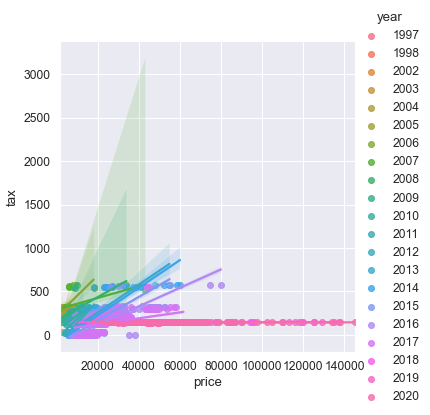

In [ ]:
sns.lmplot('price','tax',data=df,hue='year')
plt.show()

- From the plot we can see that during the year 2007-2011 the tax rose drastically even for cheaper car models.

### Question 13. Analyse different variables using pair plot and write your inferences.

#### 6.1 Pairplot

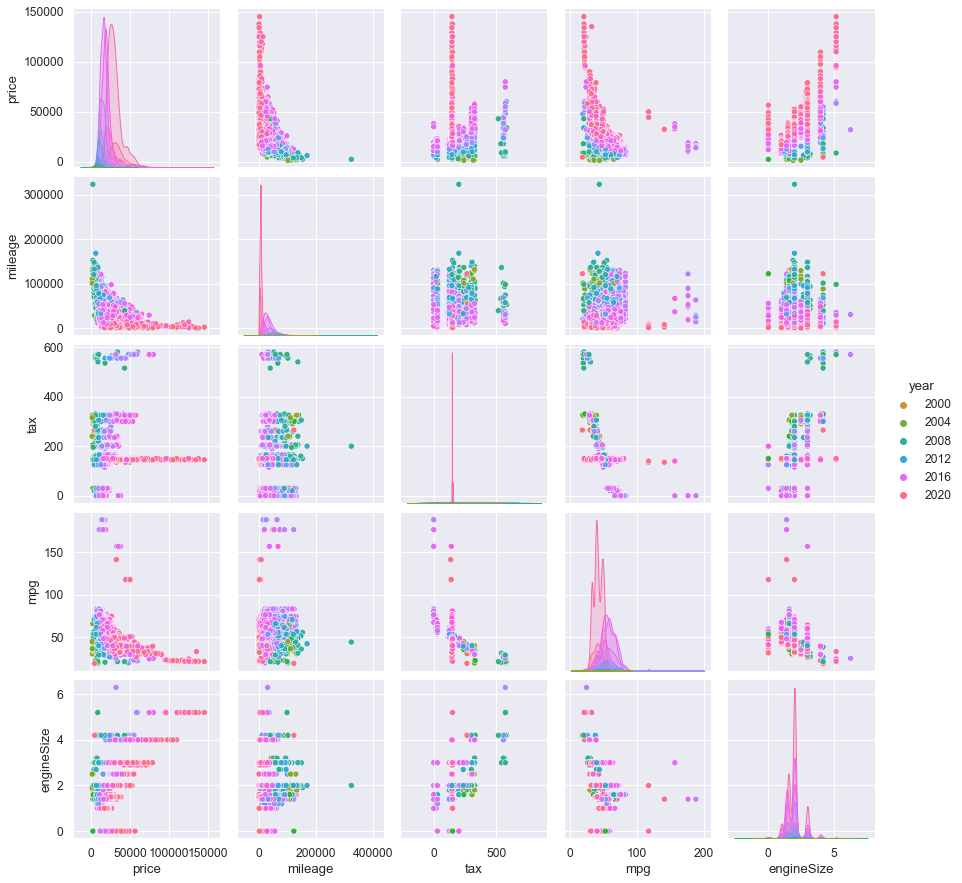

In [ ]:
sns.pairplot(df, hue='year', kind="scatter",diag_kind="kde", palette="husl")
plt.show()

- By pairplot we can observe that the bigger the engine size the more expensive the car model is.
- Lesser the values of mpg the price is also lesser.

----------
### Happing Learning :)
---------